# Part c and d 

In [1]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
plt.rcParams.update({
    "text.usetex": True,       
    "font.family": "serif",    
    "font.size": 10, 
})

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 1500
lambda_               = 1e-3
# Hyperparameters from part c, d e and f:
learning_rate = 0.005
n_iterations  = 100000
tolerance     = 1e-12
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.999
epsilon       = 1e-8
lambda_       = 0.001
batch_size    = 32

out_dir = Path("../Figures")      # fra Code/ til Figures/
out_dir.mkdir(parents=True, exist_ok=True)

### Using shared functions to create dataset

In [ ]:
train, test, full = make_data(number_of_data_points, seed)
x, y = full[0], full[1]

# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
x = x.reshape(-1, 1)

In [4]:
# Making a design matrix based of the scaled data
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test, polynomial_degree, intercept=True)

## Part c: Writing your own gradient decent code 

Replace now the analytical expressions for the optimal parameters $\theta$ with your own gradient descent code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning rate (excercises from week 37 and lecture notes from week 36).

Study and compare your results from parts a) and b) with your gradient descent approach. Discuss in particular the role of the learning rate.

In [9]:
n_iterations = 100000

# OLS regression : 
# OLS analytical solution
theta_ols  = OLS_parameters(X_train, y_train)
y_pred_ols = X_test @ theta_ols
mse_ols    = MSE(y_test, y_pred_ols)
r2_ols     = R2(y_test, y_pred_ols)
# Gradient descent solution
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
cost_histories_ols = []
pred_ols = []
mses_ols = []
r2s_ols  = []
print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print()
for i in learning_rate:
    print(f"Learning rate: {i}")
    theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, i, n_iterations, tolerance, use_tol)
    y_pred_gd_ols = X_test @ theta_gd_ols
    mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
    r2_gd_ols     = R2(y_test, y_pred_gd_ols)
    cost_histories_ols.append(cost_history_ols)
    pred_ols.append(y_pred_gd_ols)
    mses_ols.append(mse_gd_ols)
    r2s_ols.append(r2_gd_ols)
    # Print results
    print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")
    print()



OLS Analytical Solution : MSE = 0.000038, R2 = 0.875382

Learning rate: 0.001
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000111, R2 = 0.631736

Learning rate: 0.01
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000081, R2 = 0.730305

Learning rate: 0.1
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000063, R2 = 0.792915

Learning rate: 0.2
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000061, R2 = 0.799109

Learning rate: 0.3
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000060, R2 = 0.800497



In [11]:

# RIDGE regression : 
# Analytical solution
beta_ridge   = Ridge_parameters(X_train, y_train, lambda_)
y_pred_ridge = X_test @ beta_ridge
mse_ridge    = MSE(y_test, y_pred_ridge)
r2_ridge     = R2(y_test, y_pred_ridge)
# Gradient descent solution
cost_histories_ridge = []
pred_ridge = []
mses_ridge = []
r2s_ridge  = []
print(f"Ridge Analytical Solution: MSE = {mse_ridge:.6f}, R2 = {r2_ridge:.6f}")
for i in learning_rate:
    print(f"Learning rate: {i}")
    theta_gd_ridge, cost_history_ridge = gradient_descent_ridge(X_train, y_train, lambda_, i, n_iterations, tolerance, use_tol)
    y_pred_gd_ridge = X_test @ theta_gd_ridge
    mse_gd_ridge    = MSE(y_test, y_pred_gd_ridge)
    r2_gd_ridge     = R2(y_test, y_pred_gd_ridge)
    pred_ridge.append(y_pred_gd_ridge)
    cost_histories_ridge.append(cost_history_ridge)
    mses_ridge.append(mse_gd_ridge)
    r2s_ridge.append(r2_gd_ridge)

    # Print results
    print(f"Ridge Gradient Descent:    MSE = {mse_gd_ridge:.6f}, R2 = {r2_gd_ridge:.6f}")

Ridge Analytical Solution: MSE = 0.000049, R2 = 0.839120
Learning rate: 0.001
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000113, R2 = 0.626153
Learning rate: 0.01
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000090, R2 = 0.702146
Learning rate: 0.1
Ridge converged after 29001 iterations.
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000090, R2 = 0.703695
Learning rate: 0.2
Ridge converged after 15318 iterations.
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000090, R2 = 0.703701
Learning rate: 0.3
Ridge converged after 10530 iterations.
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000090, R2 = 0.703703


In [17]:

# Gradient descent solution
cost_histories_lasso = []
pred_lasso = []
mses_lasso = []
r2s_lasso  = []
for i in learning_rate:
    print(f"Learning rate: {i}")
    theta_gd_lasso, cost_history_lasso = gradient_descent_lasso(X_train, y_train, lambda_, i, n_iterations, tolerance, use_tol)
    y_pred_gd_lasso = X_test @ theta_gd_lasso
    mse_gd_lasso    = MSE(y_test, y_pred_gd_lasso)
    r2_gd_lasso     = R2(y_test, y_pred_gd_lasso)
    pred_lasso.append(y_pred_gd_lasso)
    cost_histories_lasso.append(cost_history_lasso)
    mses_lasso.append(mse_gd_lasso)
    r2s_lasso.append(r2_gd_lasso)
    # Print results
    print(f"Ridge Gradient Descent:    MSE = {mse_gd_lasso:.6f}, R2 = {r2_gd_lasso:.6f}")

Learning rate: 0.001
Ridge Gradient Descent:    MSE = 0.000111, R2 = 0.631965
Learning rate: 0.01
Ridge Gradient Descent:    MSE = 0.000083, R2 = 0.724979
Learning rate: 0.1
Converged after 90823 iterations.
Ridge Gradient Descent:    MSE = 0.000076, R2 = 0.747576
Learning rate: 0.2
Converged after 92426 iterations.
Ridge Gradient Descent:    MSE = 0.000076, R2 = 0.749460
Learning rate: 0.3
Ridge Gradient Descent:    MSE = 0.000075, R2 = 0.750214


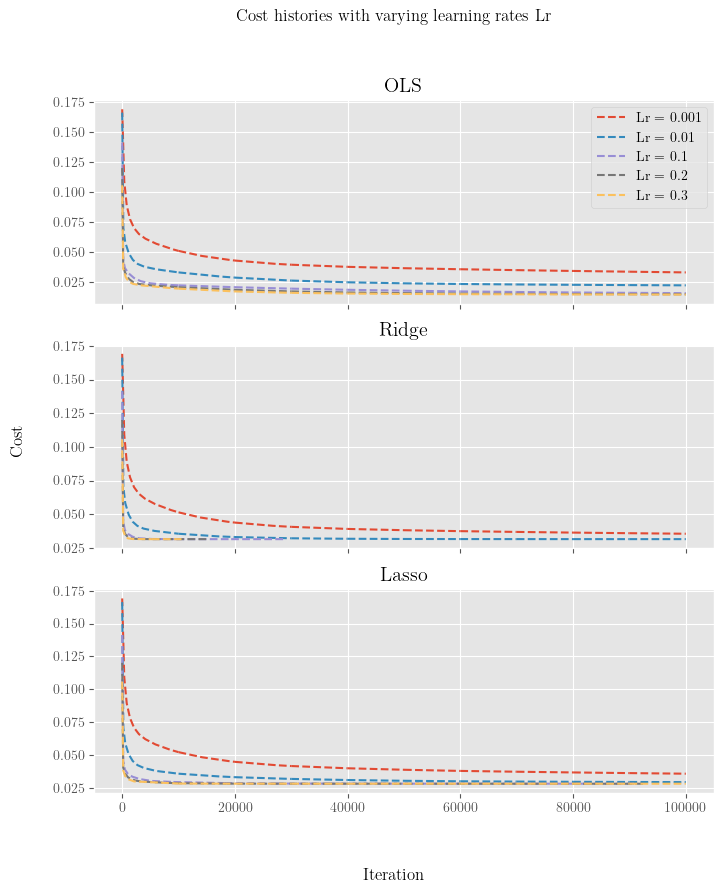

In [41]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(8, 9)

ax[2].plot(cost_histories_lasso[0],  linestyle='--')
ax[2].plot(cost_histories_lasso[1],  linestyle='--')
ax[2].plot(cost_histories_lasso[2],  linestyle='--')
ax[2].plot(cost_histories_lasso[3],  linestyle='--')
ax[2].plot(cost_histories_lasso[4],  linestyle='--')
ax[1].plot(cost_histories_ridge[0],  linestyle='--')
ax[1].plot(cost_histories_ridge[1],  linestyle='--')
ax[1].plot(cost_histories_ridge[2],  linestyle='--')
ax[1].plot(cost_histories_ridge[3],  linestyle='--')
ax[1].plot(cost_histories_ridge[4],  linestyle='--')
ax[0].plot(cost_histories_ols[0], label='Lr = 0.001',  linestyle='--')
ax[0].plot(cost_histories_ols[1], label='Lr = 0.01',  linestyle='--')
ax[0].plot(cost_histories_ols[2], label='Lr = 0.1',  linestyle='--')
ax[0].plot(cost_histories_ols[3], label='Lr = 0.2',  linestyle='--')
ax[0].plot(cost_histories_ols[4], label='Lr = 0.3',  linestyle='--')
ax[0].legend()
fig.supxlabel("Iteration")
fig.supylabel("Cost")
fig.suptitle("Cost histories with varying learning rates Lr")
ax[2].set_title("Lasso")
ax[1].set_title("Ridge")
ax[0].set_title("OLS")
plt.savefig(out_dir / "GD_all_cost_dlr.pdf" , dpi=200, bbox_inches="tight")

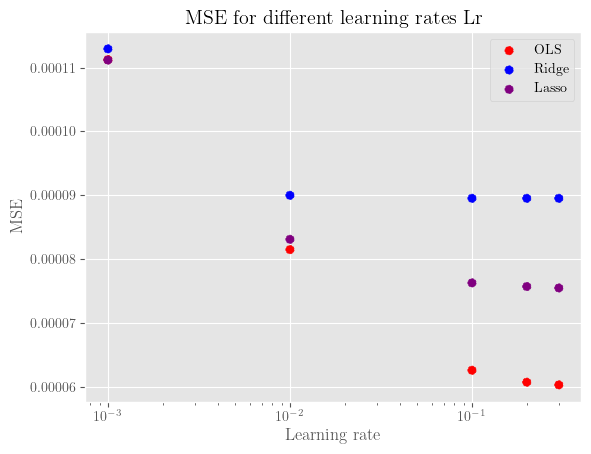

In [31]:
plt.scatter(0.001,mses_ols[0], label=f'OLS', linestyle='--',color='red')
plt.scatter(0.001,mses_ridge[0], label=f'Ridge', linestyle='--',color="blue")
plt.scatter(0.001,mses_lasso[0], label=f'Lasso', linestyle='--',color="purple")
for i,j in enumerate(learning_rate[1:]):
    plt.scatter(j,mses_ols[i+1], linestyle='--',color='red')
    plt.scatter(j,mses_ridge[i+1], linestyle='--',color="blue")
    plt.scatter(j,mses_lasso[i+1], linestyle='--',color="purple")
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("MSE for different learning rates Lr")
plt.legend()
plt.xscale("log")
plt.savefig(out_dir / "MSE_all_dlr.pdf" , dpi=200, bbox_inches="tight")


## Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

In [7]:
methods = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']

In [8]:
results = {}
learning_rate = 0.001
n_iterations  = 100000
for method in methods:
    theta_OLS, cost_history_OLS     = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Ridge, cost_history_Ridge = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Lasso, cost_history_Lasso = gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000111, R2 = 0.631736
Ridge : gd: MSE = 0.000113, R2 = 0.626153
Lasso : gd: MSE = 0.000111, R2 = 0.631965

OLS   : momentum: MSE = 0.000081, R2 = 0.730303
Ridge : momentum: MSE = 0.000090, R2 = 0.702148
Lasso : momentum: MSE = 0.000083, R2 = 0.724981

OLS   : adagrad: MSE = 0.000153, R2 = 0.492149
Ridge : adagrad: MSE = 0.000153, R2 = 0.493260
Lasso : adagrad: MSE = 0.000152, R2 = 0.495404

ridge: rmsprop converged after 4800 iterations.
OLS   : rmsprop: MSE = 0.000054, R2 = 0.820339
Ridge : rmsprop: MSE = 0.000090, R2 = 0.703465
Lasso : rmsprop: MSE = 0.000075, R2 = 0.750105

ols: adam converged after 96205 iterations.
ridge: adam converged after 5607 iterations.
OLS   : adam: MSE = 0.000045, R2 = 0.851462
Ridge : adam: MSE = 0.000090, R2 = 0.703703
Lasso : adam: MSE = 0.000075, R2 = 0.750217



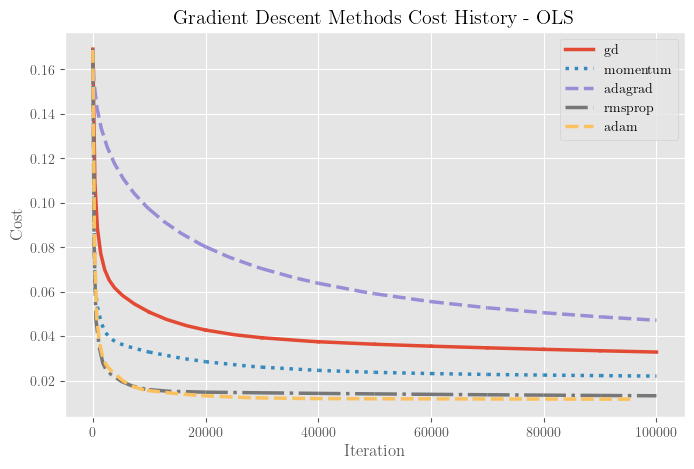

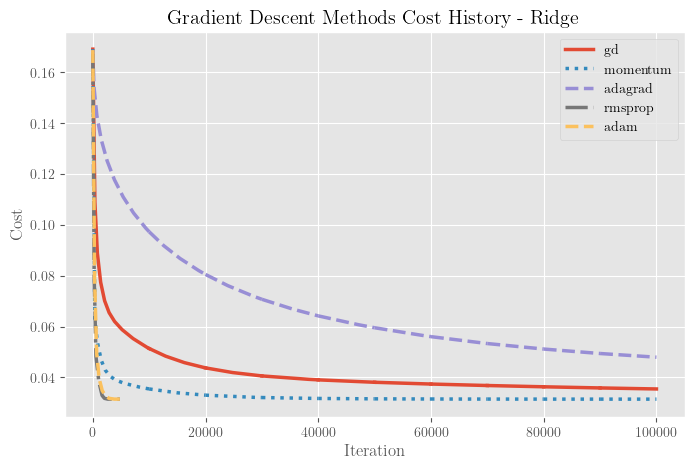

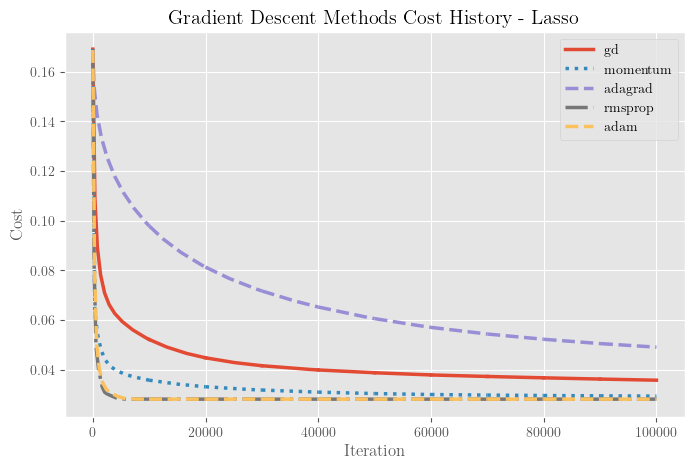

In [9]:
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': '#F5276C'}
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
# Plot cost history for all methods
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("Gradient Descent Methods Cost History - OLS")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("Gradient Descent Methods Cost History - Ridge")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("Gradient Descent Methods Cost History - Lasso")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

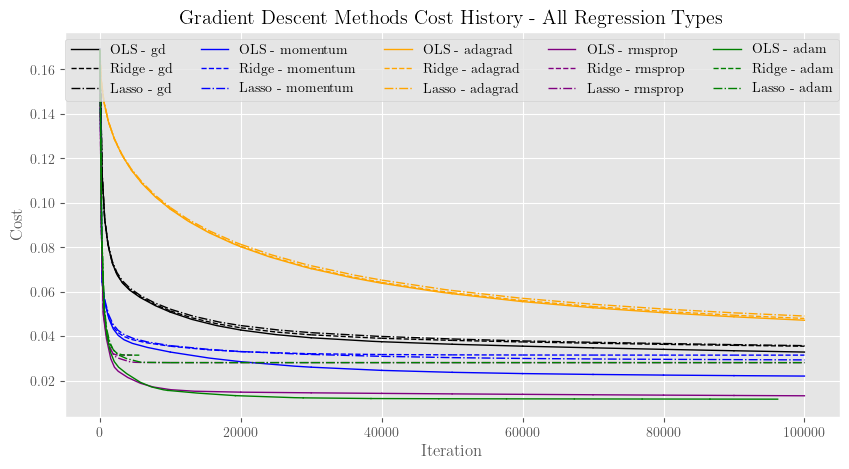

In [10]:
# Same plots for all regression types in one figure, with one linestyles per regression type, and different colors for the different  methods
plt.figure(figsize=(10, 5))
colors_OLS   = {'gd': 'black', 'momentum': 'blue', 'adagrad': 'orange', 'rmsprop': 'purple', 'adam': 'green'}
colors_Ridge = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Lasso = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
for method in methods:
    plt.plot(results[method]['cost_history_OLS'],   label=f'OLS - {method}',   linewidth=1, linestyle='-', color=colors_OLS[method])
    plt.plot(results[method]['cost_history_Ridge'], label=f'Ridge - {method}', linewidth=1, linestyle='--', color=colors_OLS[method])
    plt.plot(results[method]['cost_history_Lasso'], label=f'Lasso - {method}', linewidth=1, linestyle='dashdot', color=colors_OLS[method])
plt.title("Gradient Descent Methods Cost History - All Regression Types")
plt.xlabel("Iteration")
plt.ylabel("Cost")  
# Making the legend outside the plot
plt.legend(loc='upper center',ncols=5)
plt.show()

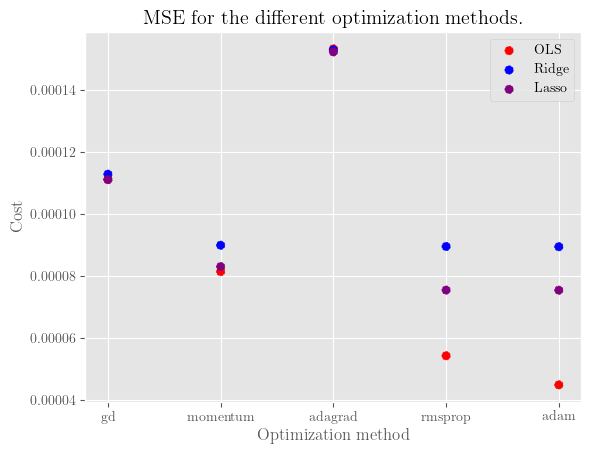

In [35]:
for i, method in enumerate(methods):
    plt.scatter(i, results[method]["mse_OLS"], color = "red", ls = "--")
    plt.scatter(i,results[method]["mse_Ridge"], color = "blue", ls = "--")
    plt.scatter(i, results[method]["mse_Lasso"], color = "purple", ls = "--")

plt.legend(["OLS", "Ridge", "Lasso"])
i = np.arange(0,5)
plt.xticks(i,methods)
plt.ylabel("Cost")
plt.xlabel("Optimization method")
plt.title("MSE for the different optimization methods.")
plt.savefig(out_dir / "MSE_SGD.pdf" , dpi=200, bbox_inches="tight")